In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

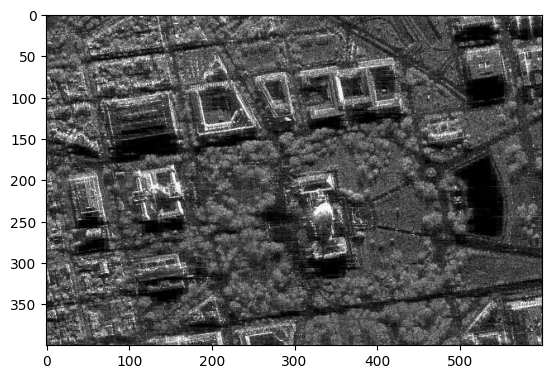

In [3]:
img = cv2.imread("sar_1_gray.jpg").astype("uint8")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

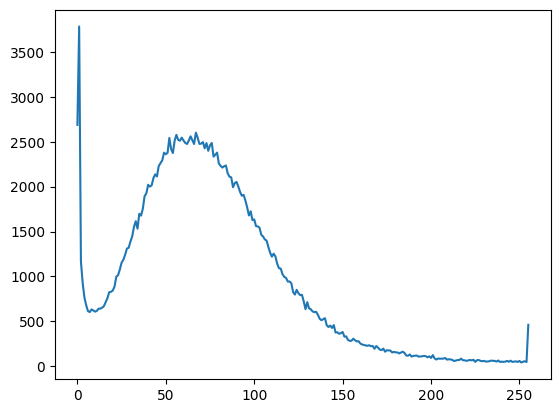

In [4]:
histSize = 256
histRange = (0, 256)
accumulate = False

img_gray_hist = cv2.calcHist([img_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(img_gray_hist)

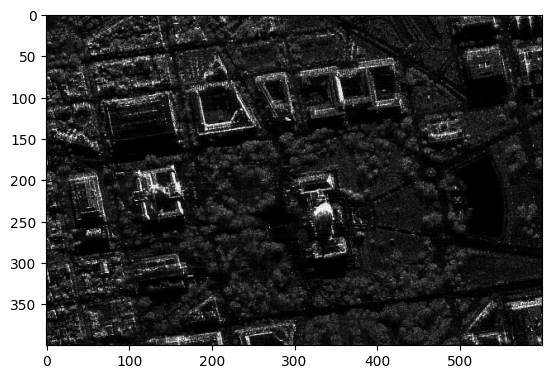

In [5]:
gamma_correction = 2
max_num = img.max()
img_correct = ((img/max_num) ** gamma_correction) * max_num
img_correct = img_correct.astype(np.uint8)    

plt.imshow(img_correct)
plt.show()

SSIM: 0.5270459922820344


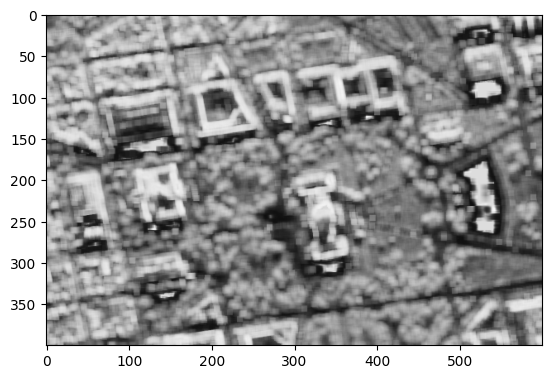

In [6]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(img, img_correct, full=True, channel_axis=2)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

plt.imshow(diff)

In [11]:
mse = mean_squared_error(img, img_correct)
print(mse)

2383.7636375


In [ ]:
eq_gray = cv2.equalizeHist(img_gray)

b, g, r = cv2.split(img)
channels = [b, g, r]
channels_corrected = []

for ch in channels:
    mean_old = ch.mean()
    std_old = ch.std()
    
    mean_target = eq_gray.mean()
    std_target = eq_gray.std()
    
    ch_new = ((ch - mean_old) / std_old) * std_target + mean_target
    ch_new = np.clip(ch_new, 0, 255).astype(np.uint8)
    
    channels_corrected.append(ch_new)

img_corrected = cv2.merge(channels_corrected)
plt.imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))

[[ 23  46  64 ... 116 192 206]
 [ 75  76  65 ... 105 164 249]
 [ 75  64  43 ...  89 129 255]
 ...
 [140  64  90 ... 169 137 115]
 [126  99  85 ... 170 139 168]
 [115  90  91 ...  94  89 196]]


In [9]:
thresholds = [50, 100, 150, 200]
algoritms = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]

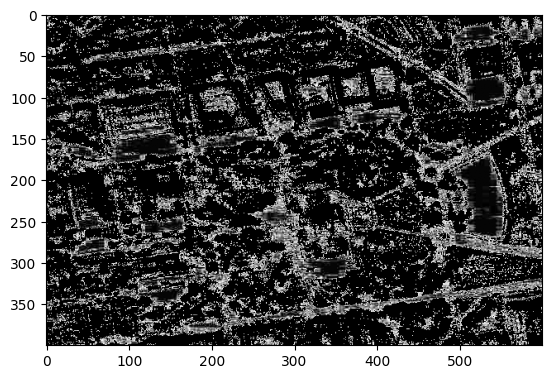

In [10]:
_,thresh1 = cv2.threshold(img_gray, thresholds[0], 255, algoritms[4])
plt.imshow(thresh1, cmap='gray') 